# マイナビ　学生コンペ
## アプローチ
- データ相関
- randam forest
- boosting

## データ読み込み

In [1]:
import pandas as pd
import numpy as np

In [2]:
trainData = pd.read_csv("./input/train.csv")
testData = pd.read_csv("./input/test.csv")
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199


In [3]:
trainData.dtypes

id                 int64
match_date        object
kick_off_time     object
section           object
round             object
home_team         object
away_team         object
venue             object
weather           object
temperature      float64
humidity           int64
broadcasters      object
attendance         int64
dtype: object

In [4]:
trainData.columns.values

array(['id', 'match_date', 'kick_off_time', 'section', 'round',
       'home_team', 'away_team', 'venue', 'weather', 'temperature',
       'humidity', 'broadcasters', 'attendance'], dtype=object)

In [5]:
import seaborn as sns
sns.heatmap(trainData[[ 'temperature','humidity','attendance']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

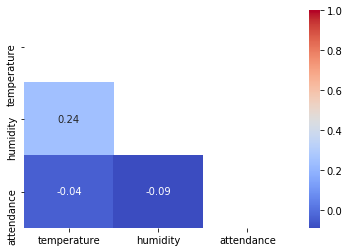

In [6]:
mask = np.zeros_like(trainData[['temperature','humidity','attendance']].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(trainData[[ 'temperature','humidity','attendance']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm", mask=mask)

### int型になっているデータのほとんどが相関性がないので使えなさそう
- 相関性がありそうなobject
-- 曜日，天気，スタジアム
→数値化して見てみる

#### 天気

In [7]:
pd.get_dummies(trainData["weather"]).columns.values

array(['屋内', '晴', '晴のち曇', '晴のち曇一時雨', '晴のち雨', '晴のち雪', '晴一時曇', '晴一時雨',
       '晴一時雨のち曇', '晴時々曇', '晴時々曇一時雨', '晴時々雪', '曇', '曇のち晴', '曇のち雨',
       '曇のち雨のち屋内', '曇のち雨のち晴', '曇のち雨のち曇', '曇のち雨一時雷', '曇のち雷雨', '曇一時晴',
       '曇一時雨', '曇一時雨のち晴', '曇一時雨のち曇', '曇一時雷雨のち曇', '曇一時雷雨のち雨', '曇時々晴',
       '曇時々晴のち屋内', '曇時々晴一時雨', '曇時々雨', '曇時々雨のち晴', '曇時々雪', '雨', '雨のち晴',
       '雨のち曇', '雨のち曇のち晴', '雨のち曇一時雨', '雨のち曇時々雨', '雨一時曇', '雨一時曇のち雨',
       '雨一時雷雨', '雨時々晴', '雨時々曇', '雪', '雷雨のち曇', '霧'], dtype=object)

In [8]:
trainData["weather"] = trainData["weather"].map({'屋内':0, '晴':1, '晴のち曇':2, '晴のち曇一時雨':3, '晴のち雨':4, '晴のち雪':5, '晴一時曇':6, '晴一時雨':7,
       '晴一時雨のち曇':8, '晴時々曇':9, '晴時々曇一時雨':10, '晴時々雪':11, '曇':12, '曇のち晴':13, '曇のち雨':14,
       '曇のち雨のち屋内':15, '曇のち雨のち晴':16, '曇のち雨のち曇':17, '曇のち雨一時雷':18, '曇のち雷雨':19, '曇一時晴':20,
       '曇一時雨':21, '曇一時雨のち晴':22, '曇一時雨のち曇':23, '曇一時雷雨のち曇':24, '曇一時雷雨のち雨':25, '曇時々晴':26,
       '曇時々晴のち屋内':27, '曇時々晴一時雨':28, '曇時々雨':29, '曇時々雨のち晴':30, '曇時々雪':31, '雨':32, '雨のち晴':33,
       '雨のち曇':34, '雨のち曇のち晴':35, '雨のち曇一時雨':36, '雨のち曇時々雨':37, '雨一時曇':38, '雨一時曇のち雨':39,
       '雨一時雷雨':40, '雨時々晴':41, '雨時々曇':42, '雪':43, '雷雨のち曇':44, '霧':45})

In [9]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,1,8.3,40,NHK総合/J SPORTS(録),20916
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,1,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,1,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,1,11.6,42,J SPORTS,28564
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,1,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199


#### スタジアム

In [10]:
pd.get_dummies(trainData["venue"]).columns.values

array(['IAIスタジアム日本平', 'NACK5スタジアム大宮', 'NDソフトスタジアム山形', 'ShonanBMWスタジアム平塚',
       'さいたま市浦和駒場スタジアム', 'アウトソーシングスタジアム日本平', 'エコパスタジアム', 'エディオンスタジアム広島',
       'キンチョウスタジアム', 'コカ・コーラウエスト広島スタジアム', 'デンカビッグスワンスタジアム', 'ニッパツ三ツ沢球技場',
       'ノエビアスタジアム神戸', 'パロマ瑞穂スタジアム', 'フクダ電子アリーナ', 'ベストアメニティスタジアム',
       'ホームズスタジアム神戸', 'ヤマハスタジアム(磐田)', 'ヤンマースタジアム長居', 'ユアテックスタジアム仙台',
       'レベルファイブスタジアム', '万博記念競技場', '九州石油ドーム', '京都市西京極総合運動公園陸上競技場兼球技場',
       '佐賀県総合運動場陸上競技場', '名古屋市瑞穂球技場', '名古屋市瑞穂陸上競技場', '味の素スタジアム', '国立競技場',
       '埼玉スタジアム2002', '大分銀行ドーム', '大阪長居スタジアム', '大阪長居第2陸上競技場', '宮城スタジアム',
       '山梨中銀スタジアム', '山梨県小瀬スポーツ公園陸上競技場', '市立吹田サッカースタジアム', '平塚競技場',
       '広島ビッグアーチ', '新潟スタジアム', '日本平スタジアム', '日産スタジアム', '日立柏サッカー場', '札幌ドーム',
       '札幌厚別公園競技場', '東北電力ビッグスワンスタジアム', '東平尾公園博多の森球技場', '松本平広域公園総合球技場',
       '柏の葉公園総合競技場', '横浜市三ツ沢公園球技場', '熊本県民総合運動公園陸上競技場', '熊谷スポーツ文化公園陸上競技場',
       '県立カシマサッカースタジアム', '石川県西部緑地公園陸上競技場', '神戸総合運動公園ユニバー記念競技場',
       '等々力陸上競技場', '豊田スタジアム', '静岡スタジアムエコパ', '鳴門・大塚スポーツパークポカリスエットスタジアム',
       '

In [11]:
trainData["venue"] = trainData["venue"].map({'IAIスタジアム日本平':0, 'NACK5スタジアム大宮':1, 'NDソフトスタジアム山形':2, 'ShonanBMWスタジアム平塚':3,
       'さいたま市浦和駒場スタジアム':4, 'アウトソーシングスタジアム日本平':5, 'エコパスタジアム':6, 'エディオンスタジアム広島':7,
       'キンチョウスタジアム':8, 'コカ・コーラウエスト広島スタジアム':9, 'デンカビッグスワンスタジアム':10, 'ニッパツ三ツ沢球技場':11,
       'ノエビアスタジアム神戸':12, 'パロマ瑞穂スタジアム':13, 'フクダ電子アリーナ':14, 'ベストアメニティスタジアム':15,
       'ホームズスタジアム神戸':16, 'ヤマハスタジアム(磐田)':17, 'ヤンマースタジアム長居':18, 'ユアテックスタジアム仙台':19,
       'レベルファイブスタジアム':20, '万博記念競技場':21, '九州石油ドーム':22, '京都市西京極総合運動公園陸上競技場兼球技場':23,
       '佐賀県総合運動場陸上競技場':24, '名古屋市瑞穂球技場':25, '名古屋市瑞穂陸上競技場':26, '味の素スタジアム':27, '国立競技場':28,
       '埼玉スタジアム2002':29, '大分銀行ドーム':30, '大阪長居スタジアム':31, '大阪長居第2陸上競技場':32, '宮城スタジアム':33,
       '山梨中銀スタジアム':34, '山梨県小瀬スポーツ公園陸上競技場':35, '市立吹田サッカースタジアム':36, '平塚競技場':37,
       '広島ビッグアーチ':38, '新潟スタジアム':39, '日本平スタジアム':40, '日産スタジアム':41, '日立柏サッカー場':42, '札幌ドーム':43,
       '札幌厚別公園競技場':44, '東北電力ビッグスワンスタジアム':45, '東平尾公園博多の森球技場':46, '松本平広域公園総合球技場':47,
       '柏の葉公園総合競技場':48, '横浜市三ツ沢公園球技場':49, '熊本県民総合運動公園陸上競技場':50, '熊谷スポーツ文化公園陸上競技場':51,
       '県立カシマサッカースタジアム':52, '石川県西部緑地公園陸上競技場':53, '神戸総合運動公園ユニバー記念競技場':54,
       '等々力陸上競技場':55, '豊田スタジアム':56, '静岡スタジアムエコパ':57, '鳴門・大塚スポーツパークポカリスエットスタジアム':58,
       '鹿児島県立鴨池陸上競技場':59})

In [12]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,21,1,8.3,40,NHK総合/J SPORTS(録),20916
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,35,1,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,27,1,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,57,1,11.6,42,J SPORTS,28564
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,26,1,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199


#### 日付→曜日→ダミー

In [16]:
from datetime import datetime
import locale
for i in range(len(trainData)):
    trainData["match_date"][i] = trainData["match_date"][i].replace("-0",",").replace("-",",")

/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance
0,9190,"2006,3,4",16:04,第1節,第1日,G大阪,浦和,21,1,8.3,40,NHK総合/J SPORTS(録),20916
1,9191,"2006,3,5",13:00,第1節,第2日,甲府,清水,35,1,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277
2,9192,"2006,3,5",13:35,第1節,第2日,FC東京,大分,27,1,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531
3,9193,"2006,3,5",14:04,第1節,第2日,磐田,福岡,57,1,11.6,42,J SPORTS,28564
4,9194,"2006,3,5",14:04,第1節,第2日,名古屋,C大阪,26,1,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199


In [18]:
from datetime import datetime
datetime.strptime(trainData["match_date"][1],"%Y,%m,%d")

datetime.datetime(2006, 3, 5, 0, 0)

In [19]:
day_of_the_week = []
month =[]
for i in range(len(trainData)):
    day_of_the_week.append(datetime.strptime(trainData["match_date"][i],"%Y,%m,%d").strftime('%a'))
    #day_of_the_week.append(datetime.datetime(datetime.strptime(trainData["match_date"][1],"%Y,%m,%d").strftime("%A")))

In [20]:
trainData["day_of_the_week"] = day_of_the_week

In [21]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,day_of_the_week
0,9190,"2006,3,4",16:04,第1節,第1日,G大阪,浦和,21,1,8.3,40,NHK総合/J SPORTS(録),20916,Sat
1,9191,"2006,3,5",13:00,第1節,第2日,甲府,清水,35,1,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,Sun
2,9192,"2006,3,5",13:35,第1節,第2日,FC東京,大分,27,1,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,Sun
3,9193,"2006,3,5",14:04,第1節,第2日,磐田,福岡,57,1,11.6,42,J SPORTS,28564,Sun
4,9194,"2006,3,5",14:04,第1節,第2日,名古屋,C大阪,26,1,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,Sun


In [22]:
pd.get_dummies(trainData["day_of_the_week"]).columns.values

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object)

In [23]:
trainData["day_of_the_week"] = trainData["day_of_the_week"].map({'Fri':6, 'Mon':1, 'Sat':7, 'Sun':0, 'Thu':5, 'Tue':2, 'Wed':4})

In [24]:
trainData.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,day_of_the_week
0,9190,"2006,3,4",16:04,第1節,第1日,G大阪,浦和,21,1,8.3,40,NHK総合/J SPORTS(録),20916,7
1,9191,"2006,3,5",13:00,第1節,第2日,甲府,清水,35,1,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,0
2,9192,"2006,3,5",13:35,第1節,第2日,FC東京,大分,27,1,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,0
3,9193,"2006,3,5",14:04,第1節,第2日,磐田,福岡,57,1,11.6,42,J SPORTS,28564,0
4,9194,"2006,3,5",14:04,第1節,第2日,名古屋,C大阪,26,1,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,0


In [25]:
trainData.dtypes

id                   int64
match_date          object
kick_off_time       object
section             object
round               object
home_team           object
away_team           object
venue                int64
weather              int64
temperature        float64
humidity             int64
broadcasters        object
attendance           int64
day_of_the_week      int64
dtype: object

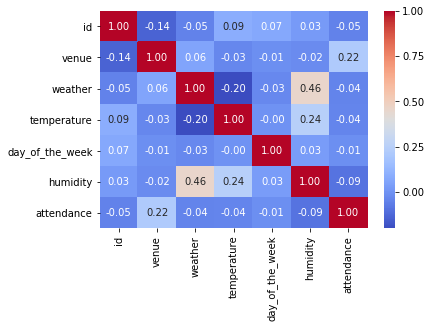

In [26]:
sns.heatmap(trainData[['id','venue','weather','temperature','day_of_the_week','humidity','attendance']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

#### セクション，ラウンド

In [27]:
pd.get_dummies(trainData["section"]).columns.values

array(['第10節', '第11節', '第12節', '第13節', '第14節', '第15節', '第16節', '第17節',
       '第18節', '第19節', '第1節', '第20節', '第21節', '第22節', '第23節', '第24節',
       '第25節', '第26節', '第27節', '第28節', '第29節', '第2節', '第30節', '第31節',
       '第32節', '第33節', '第34節', '第3節', '第4節', '第5節', '第6節', '第7節', '第8節',
       '第9節'], dtype=object)

In [28]:
for i in range(len(trainData)):
    trainData["section"][i] = trainData["section"][i].replace("第","").replace("節","")

/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
for i in range(len(trainData)):
    trainData["round"][i] = trainData["round"][i].replace("第","").replace("日","")

/home/aj1m0n/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
